# The program calculates the Sales, Orders, Conversion Rate (CR) and Average Order Value (AOV) for 10 different products. The program saves the report to excel file and displays plots, which helps to visualise the report results.

## First, we need to import necessary libraries, which we gonna use to prepare our analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Then, we need to load the excel files with our data and assign it to variables, so it will be easier for us to work with them

In [2]:
sales_df = pd.read_excel('sales.xlsx')
orders_df = pd.read_excel('orders.xlsx')
traffic_df = pd.read_excel('traffic.xlsx')

## Now, we need to prepare (clean) the data, so we can easily work with our data and fianlly prepare the final report

### Let's start from sales

In [3]:
sales_df.head()

,Date,A_page1,B_page-x,B_page-w,C-page1,D-page2,E-page3,F=page3,G-page3,H-page1,H-page2,H-pageW,I-page1,J-page3
0,2020-04-01,324,432,89,42,4,23,423,432,4,32,432,432,4
1,2020-04-02,45,4,324,23,45,4,4,435,3,43,435,43,32
2,2020-04-03,456,5,98,4,234,43,5,5,4,434,4,5,432
3,2020-04-04,456,64,977,45,4,5,45,43,453,54,534,3,345
4,2020-04-05,6,6,98,45,54,543,45,345,5,4,5,43,342


### Since we do not need to calculate sales per day, but per the whole avaible period, let's sum it up and groupby by page

In [4]:
sales_df['Date'] = sales_df['Date'].dt.year

In [5]:
sales_df = sales_df.groupby('Date').sum()

In [6]:
sales_df = sales_df.transpose()

In [7]:
sales_df = sales_df.reset_index()
sales_df.columns = ['Product','Sales']

### Now, we have ready sales data that we can easily filter and sort

In [8]:
sales_df.head()

,Product,Sales
0,A_page1,2637
1,B_page-x,2302
2,B_page-w,2531
3,C-page1,750
4,D-page2,4090


### Next, let's do the same for orders

In [9]:
orders_df['Date'] = orders_df['Date'].dt.year
orders_df = orders_df.groupby('Date').sum()
orders_df = orders_df.transpose()
orders_df.head()
orders_df = orders_df.reset_index()
orders_df.columns = ['Product','Orders']
orders_df.head()

,Product,Orders
0,A_page1,141
1,B_page-x,153
2,B_page-w,148
3,C-page1,107
4,D-page2,140


### Load traffic file to pandas data frame:

In [10]:
traffic_df = pd.read_excel('traffic.xlsx')

## Our data is cleaned and prepared, let's prepare the analysis that will include sales, orders, traffic, CR and AOS for each product (A, B, C, D, E, F, G, H, I, J). 

### In order to do so, we have to not only merge our dataframes, but also sort our products by their names and sum their sales and orders. We need to do that because sales for our products comes from different channels, for example B_page-x and B_page-w, these two channels belongs to product B. 

### Let's create a function to help us prepare the report

In [11]:
def generate_report(sales, orders, traffic):
    
    # Let's define a list, which would include the list of our products
    products_list = ['A','B','C','D','E','F','G','H','I','J']
    
    # Let's define a dictionary, so we can store our data here and then convert it to data frame
    report = {
        'Product': products_list,
        'Sales': [],
        'Orders': []
    }
    
    # Let's filter our sales_df and orders_df by the product name, to calculate all sales and orders per product
    for product in products_list:
        product_sales = sales[sales['Product'].str.contains(product)]['Sales'].sum()
        product_orders = orders[orders['Product'].str.contains(product)]['Orders'].sum()
        
        # Now, let's append the sales and orders of each product to lists in our report dicitonary
        report['Sales'].append(product_sales)
        report['Orders'].append(product_orders)
    
    # Converting dictionary to pandas data frame
    report_df = pd.DataFrame.from_dict(report)
    
    # Join traffic_df to report_df
    report_df = report_df.join(traffic)
    
    # Calculate CR & AOV
    # CR
    report_df['CR'] = round(report_df['Orders']/report_df['Traffic']*100, 2)
    
    # AOV
    report_df['AOV'] = round(report_df['Sales']/report_df['Orders'], 2)
    
    return report_df
    

# Now let's generate our report

In [12]:
report_df = generate_report(sales_df, orders_df, traffic_df)

In [13]:
report_df

,Product,Sales,Orders,Page,Traffic,CR,AOV
0,A,2637,141,A,12432,1.13,18.70
1,B,4833,301,B,4354352,0.01,16.06
2,C,750,107,C,32432,0.33,7.01
3,D,4090,140,D,323432,0.04,29.21
4,E,675,139,E,4354,3.19,4.86
5,F,939,187,F,6587657,0.00,5.02
6,G,1376,104,G,536546,0.02,13.23
7,H,7842,397,H,92342,0.43,19.75
8,I,649,157,I,342,45.91,4.13
9,J,1568,133,J,14214,0.94,11.79


## Save it to excel file

In [14]:
report_df.to_excel('report.xlsx')

# Let's visualize our data

### Sales

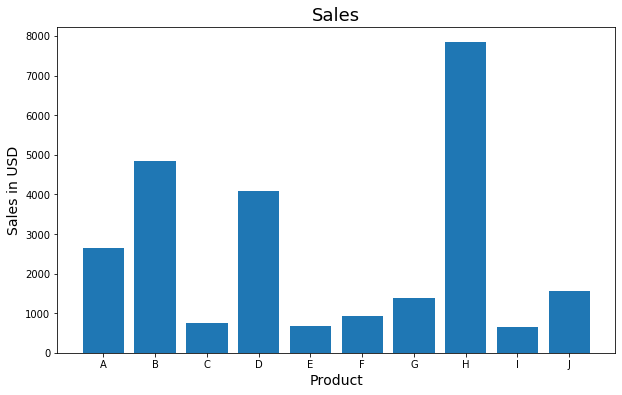

In [15]:
plt.figure(figsize=(10,6))
plt.bar(report_df['Product'], report_df['Sales'])
plt.title('Sales', fontsize=18)
plt.xlabel("Product", fontsize=14)
plt.ylabel("Sales in USD", fontsize=14)
plt.show()

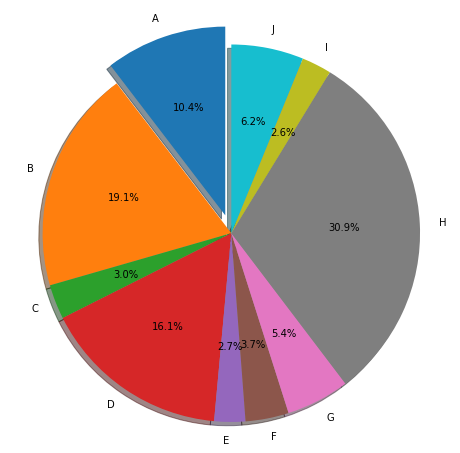

In [16]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 1st slice
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(report_df['Sales'], explode=explode, labels=report_df['Product'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Orders

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(report_df['Product'], report_df['Orders'])
plt.title('Orders', fontsize=18)
plt.xlabel("Product", fontsize=14)
plt.ylabel("Number of orders", fontsize=14)
plt.show()